In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/home/salini/Downloads/CHRISTY/Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [8]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data.shape

(150, 6)

In [10]:
numcols=data.dtypes[(data.dtypes=='float64')].index

In [11]:
for x in numcols:
    descr=data[x].describe()
    IQR=descr['75%']-descr['25%']
    upper_limit=descr['75%']+1.5*IQR
    lower_limit=descr['25%']-1.5*IQR
    data[x][data[x]>upper_limit]=upper_limit
    data[x][data[x]<lower_limit]=lower_limit

<ipython-input-11-9ab08303e841>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit]=upper_limit
<ipython-input-11-9ab08303e841>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit]=lower_limit


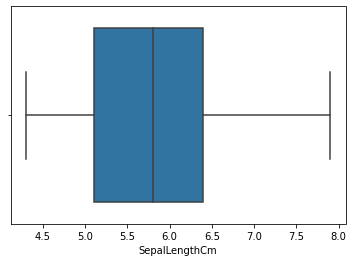

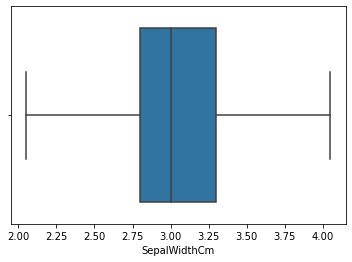

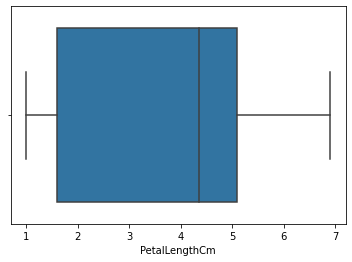

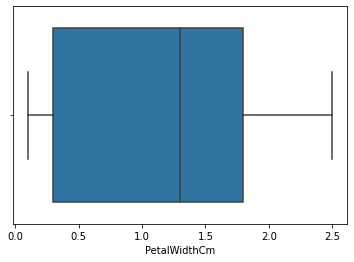

In [12]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [13]:
y=data['Species']
X=data.drop('Species',axis=1)

In [14]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [16]:
X.shape

(150, 5)

In [17]:
y.head

<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=50) 

In [19]:
X_train.shape

(100, 5)

In [20]:
y_train.shape

(100,)

In [21]:
X_test.shape

(50, 5)

In [22]:
y_test.shape

(50,)

In [23]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() #creating object of LogisticRegression
classifier.fit(X_train,y_train) #command for training /fitting the model
classifier

/home/salini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
ypred=classifier.predict(X_test)

In [26]:
X_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
88,89,5.6,3.0,4.1,1.3
72,73,6.3,2.5,4.9,1.5
20,21,5.4,3.4,1.7,0.2
16,17,5.4,3.9,1.3,0.4
147,148,6.5,3.0,5.2,2.0
140,141,6.7,3.1,5.6,2.4
113,114,5.7,2.5,5.0,2.0
23,24,5.1,3.3,1.7,0.5
12,13,4.8,3.0,1.4,0.1
68,69,6.2,2.2,4.5,1.5


In [27]:
ypred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 2, 2])

In [28]:
y_test

88     1
72     1
20     0
16     0
147    2
140    2
113    2
23     0
12     0
68     1
39     0
130    2
34     0
112    2
55     1
25     0
82     1
48     0
81     1
77     1
100    2
80     1
14     0
131    2
86     1
118    2
56     1
54     1
97     1
143    2
125    2
98     1
73     1
144    2
21     0
3      0
59     1
119    2
84     1
7      0
41     0
57     1
104    2
8      0
102    2
17     0
42     0
18     0
146    2
114    2
Name: Species, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[17,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 16]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

1.0

In [31]:
classifier.score(X_test,y_test)

1.0

In [32]:
classifier.score(X_train,y_train)

1.0